<a href="https://colab.research.google.com/github/j0nnie99/Expose-Pose_Classification/blob/main/Transfer%20Learning%20for%20Classifying%20Pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,027 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123941 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [3]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [6]:
query = 'half'
dataset_split(query, 110) # 나중에 350 정도로 수정

FileNotFoundError: ignored

In [7]:
query = 'longhalf'
dataset_split(query, 150)

[Train Dataset] naver_0264.jpg
[Train Dataset] google_0540.jpg
[Train Dataset] google_0031.jpg
[Train Dataset] naver_0043.jpg
[Train Dataset] google_0403.jpg
[Train Dataset] google_0078.jpg
[Train Dataset] naver_0315.jpg
[Train Dataset] naver_0424.jpg
[Train Dataset] google_0485.jpg
[Train Dataset] naver_0435.jpg
[Train Dataset] naver_0498.jpg
[Train Dataset] google_0278.jpg
[Train Dataset] google_0039.jpg
[Train Dataset] google_0138 (1).jpg
[Train Dataset] google_0418.jpg
[Train Dataset] naver_0027.jpg
[Train Dataset] naver_0398.png
[Train Dataset] naver_0406.jpg
[Train Dataset] naver_0393.jpg
[Train Dataset] naver_0497.jpg
[Train Dataset] google_0306.jpg
[Train Dataset] google_0265.jpg
[Train Dataset] google_0343.jpg
[Train Dataset] google_0354.jpg
[Train Dataset] google_0033 (2).jpg
[Train Dataset] google_0472.jpg
[Train Dataset] google_0116.jpg
[Train Dataset] google_0176.jpg
[Train Dataset] google_0130 (1).jpg
[Train Dataset] naver_0118.jpg
[Train Dataset] google_0458.jpg
[Train D

In [8]:
query = 'selfie'
dataset_split(query, 500)

[Train Dataset] google_0026.jpg
[Train Dataset] google_0373.jpg
[Train Dataset] naver_0192.png
[Train Dataset] naver_0275.jpg
[Train Dataset] naver_0337.png
[Train Dataset] 1 (48).jpg
[Train Dataset] naver_0358.png
[Train Dataset] naver_0341.jpg
[Train Dataset] google_0031.jpg
[Train Dataset] google_0080.jpg
[Train Dataset] naver_0477.jpg
[Train Dataset] naver_0234 (2).jpg
[Train Dataset] naver_0482.jpg
[Train Dataset] google_0016.jpg
[Train Dataset] naver_0310.jpg
[Train Dataset] 1 (82).jpg
[Train Dataset] google_0152.jpg
[Train Dataset] naver_0374.png
[Train Dataset] naver_0043.jpg
[Train Dataset] naver_0265.jpg
[Train Dataset] naver_0268.jpg
[Train Dataset] naver_0262.jpg
[Train Dataset] naver_0267.jpg
[Train Dataset] google_0035.jpg
[Train Dataset] 1 (33).jpg
[Train Dataset] naver_0298.png
[Train Dataset] naver_0113.jpg
[Train Dataset] 1 (35).jpg
[Train Dataset] 1 (74).jpg
[Train Dataset] naver_0089.jpg
[Train Dataset] naver_0213.jpg
[Train Dataset] naver_0480.jpg
[Train Dataset] n

In [9]:
query = 'wholesit'
dataset_split(query, 100)

[Train Dataset] 4dcfde893c36cc0b968d5114f610534f.jpeg
[Train Dataset] 838401e96402f06bc8fd0b4dd866348c.jpeg
[Train Dataset] 29eea5da20fdf559da5234fff8309cd3.jpeg
[Train Dataset] 68b39e9c636c0455164b94ab7fe28b0a.jpeg
[Train Dataset] f4c531267910c89f501cb568e04aef9d.jpeg
[Train Dataset] naver_0278.jpg
[Train Dataset] naver_0256.jpg
[Train Dataset] naver_0362.jpg
[Train Dataset] bd06f51f559b57f4f14fffcddb35ddab.jpeg
[Train Dataset] naver_0136.jpg
[Train Dataset] naver_0291.jpg
[Train Dataset] naver_0321.jpg
[Train Dataset] 5ad7c30ff376e9a45364f4d5fd270686.jpeg
[Train Dataset] naver_0331.jpg
[Train Dataset] naver_0399.jpg
[Train Dataset] naver_0142.jpg
[Train Dataset] 6deeffc40c0c2be35df4d621c7cca016.jpeg
[Train Dataset] 1 (8).png
[Train Dataset] naver_0277.jpg
[Train Dataset] google_0487.jpg
[Train Dataset] b2339a7bb1f07545e4d98fb06ddfc145.jpeg
[Train Dataset] 776a3476e308823f5ee6480aa9e0a99f.jpeg
[Train Dataset] google_0038.jpg
[Train Dataset] google_0053.jpg
[Train Dataset] google_0304.

In [10]:
query = 'wholestand'
dataset_split(query, 190)

[Train Dataset] aa33ce6ce58ac298d7a2abb98a8357ae.jpeg
[Train Dataset] naver_0373 (2).jpg
[Train Dataset] c9d105fec6ff6d35baa6635d308315cb.jpeg
[Train Dataset] google_0016.jpg
[Train Dataset] google_0045.jpg
[Train Dataset] 6b727663b7cc5dd34c1bc9e8958b79ba.jpeg
[Train Dataset] 556852beefb86455cb8639adbc8103a6.jpeg
[Train Dataset] 25f4d3965b8f5bf7b569ff5fc5a79005.jpeg
[Train Dataset] google_0199.jpg
[Train Dataset] 769a4cedbb86a6b267056fa91afac28e.jpeg
[Train Dataset] google_0048.jpg
[Train Dataset] google_0531.jpg
[Train Dataset] 20170117163322493cwme.jpeg
[Train Dataset] naver_0004 (2).jpg
[Train Dataset] adc4dca6293f9e822823dbe72d8990d8.jpeg
[Train Dataset] 744978a0da48bb9a767b0fd540f503e0.jpeg
[Train Dataset] naver_0398.jpg
[Train Dataset] PwldL.jpg
[Train Dataset] b1b1c2f558aba1763963205f3fefd5da.jpeg
[Train Dataset] SluBc.jpg
[Train Dataset] 914344ee853af06d9e63034eda784f25.jpeg
[Train Dataset] DBE76CtV0AAAIrh.jpeg
[Train Dataset] 51f1ab3429b3ce1e2867fb452d956e24.jpeg
[Train Datase

* <b>마동석</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = '마동석'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://newsroom.etomato.com/userfiles/DSC05084(1).jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://img.hankyung.com/photo/201905/2019051315144499235-540x778.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://image.ytn.co.kr/general/jpg/2019/0524/201905240136316108_d.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://mimgnews.pstatic.net/image/origin/213/2019/12/29/1147128.jpg)
[Error] Invalid image, not saving https://mimgnews.pstatic.net/image/origin/213/2019/12/29/1147128.jpg
[Info] Issue getting: https://mimgnews.pstatic.net/image/origin/213/2019/12/29/1147128.jpg
[Error] No active exception to reraise
#4 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99095B355A6717D415)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99095B355A6717D415
[Error] HTTP Error 403: For

* <b>김종국</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = '김종국'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://www.topstarnews.net/news/photo/first/201412/img_85925_1.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2019/08/26/30000633265_1280.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://image.chosun.com/sitedata/image/201510/21/2015102100651_0.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://img.tf.co.kr/article/home/2015/02/10/201578501423573799.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://health.chosun.com/site/data/img_dir/2019/11/29/2019112901196_0.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/9904584B5D46BF4C06)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://www.domin.co.kr/news/photo/201906/1248346_367447_5035.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://storage.enuri.info/pic_upload/knowbox2/201912/12503251320191229c591c426-72a3-4a85-9bd3-e30fe5de3751.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://image.chosun.com/sitedata/image/201708/04/2017080400585

* <b>이병헌</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = '이병헌'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2019/12/19/201912191268771658_2.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.hankyung.com/photo/201911/BF.21014258.1.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.ytimg.com/vi/WEc1PY5JOl8/maxresdefault.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2018/06/26/d24ff3d0-c01d-4e28-b3e2-929d734a0c78.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://thumb.mtstarnews.com/06/2018/01/2018010412140406096_1.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://i.ytimg.com/vi/v0IsdtbEE24/maxresdefault.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://i.ytimg.com/vi/So9bVX_ZUI8/maxresdefault.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://image.chosun.com/sitedata/image/201801/04/2018010401407_0.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2F

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

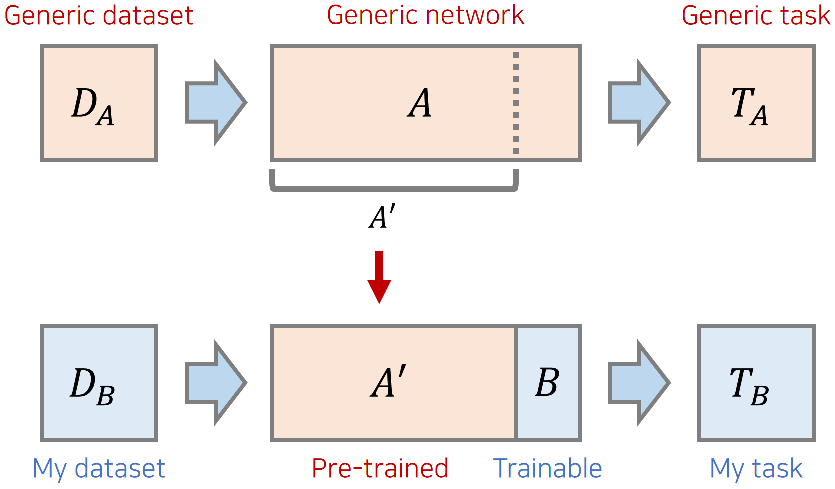

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [15]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=5, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=5, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 1050
테스트 데이터셋 크기: 404
클래스: ['half', 'longhalf', 'selfie', 'wholesit', 'wholestand']


* 간단히 이미지를 시각화해 봅시다.

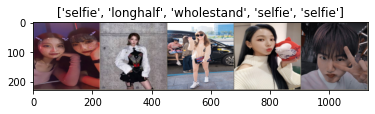

In [16]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [17]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 5개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

* 학습을 진행합니다.

In [18]:
num_epochs = 100
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 0.8692 Acc: 70.4762% Time: 17.7187s
#1 Loss: 0.3700 Acc: 87.9048% Time: 28.0996s
#2 Loss: 0.2912 Acc: 90.2857% Time: 38.5988s
#3 Loss: 0.2278 Acc: 92.5714% Time: 49.2295s
#4 Loss: 0.1826 Acc: 93.8095% Time: 60.5142s
#5 Loss: 0.1027 Acc: 96.6667% Time: 71.0367s
#6 Loss: 0.0780 Acc: 97.6190% Time: 81.5933s
#7 Loss: 0.0515 Acc: 98.8571% Time: 92.2460s
#8 Loss: 0.0270 Acc: 99.4286% Time: 102.9524s
#9 Loss: 0.0404 Acc: 98.8571% Time: 114.6811s
#10 Loss: 0.0621 Acc: 98.2857% Time: 125.2793s
#11 Loss: 0.0373 Acc: 98.9524% Time: 135.8993s
#12 Loss: 0.0549 Acc: 98.4762% Time: 146.4871s
#13 Loss: 0.0667 Acc: 97.9048% Time: 158.0744s
#14 Loss: 0.0329 Acc: 99.3333% Time: 169.7597s
#15 Loss: 0.0227 Acc: 99.2381% Time: 180.3702s
#16 Loss: 0.0133 Acc: 99.7143% Time: 191.0524s
#17 Loss: 0.0344 Acc: 98.9524% Time: 201.7517s
#18 Loss: 0.0322 Acc: 99.1429% Time: 212.3787s
#19 Loss: 0.0279 Acc: 99.2381% Time: 223.9843s
#20 Loss: 0.0110 Acc: 99.9048% Time: 234.5416s
#21 Loss: 0.0365 Acc: 99.0476% 

* 학습된 모델을 평가합니다.

[예측 결과: longhalf] (실제 정답: half)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

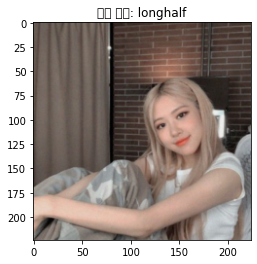

[예측 결과: half] (실제 정답: half)


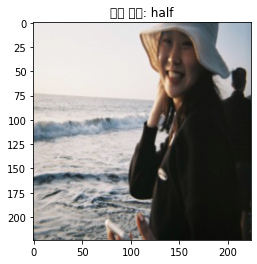

[예측 결과: half] (실제 정답: half)


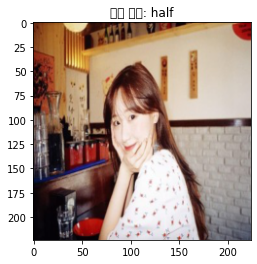

[예측 결과: selfie] (실제 정답: selfie)


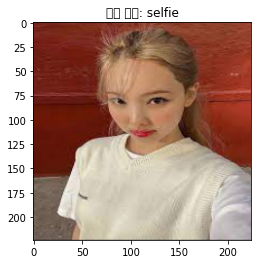

[예측 결과: half] (실제 정답: half)


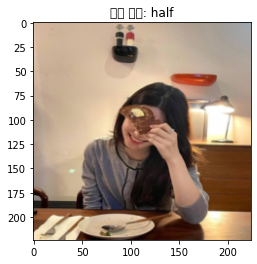

[예측 결과: half] (실제 정답: half)


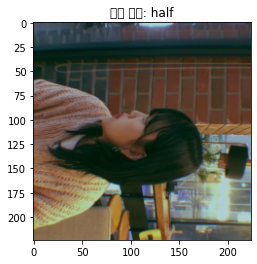

[예측 결과: half] (실제 정답: half)


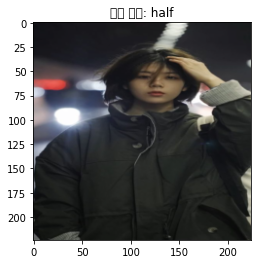

[예측 결과: wholestand] (실제 정답: wholestand)


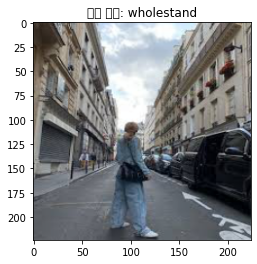

[예측 결과: half] (실제 정답: half)


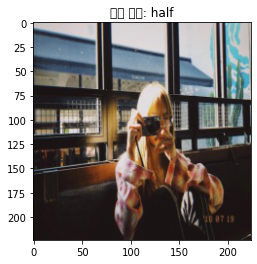

[예측 결과: half] (실제 정답: half)


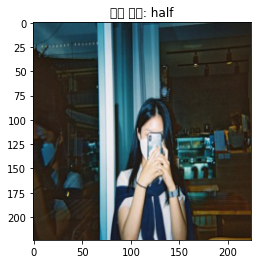

[예측 결과: half] (실제 정답: half)


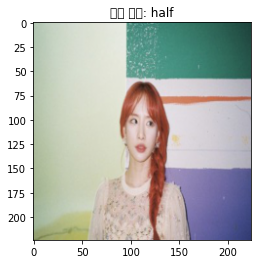

[예측 결과: wholestand] (실제 정답: wholestand)


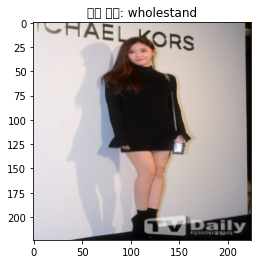

[예측 결과: half] (실제 정답: longhalf)


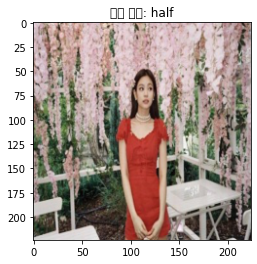

[예측 결과: selfie] (실제 정답: half)


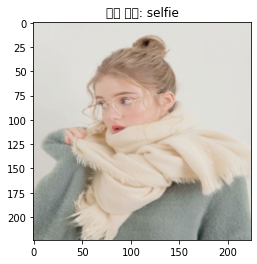

[예측 결과: half] (실제 정답: half)


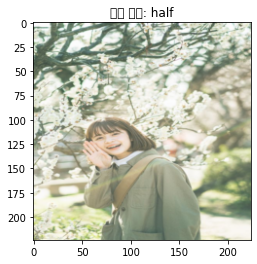

[예측 결과: half] (실제 정답: half)


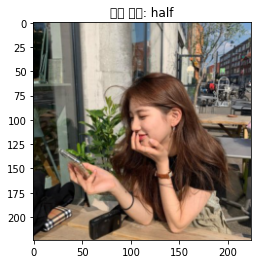

[예측 결과: half] (실제 정답: half)


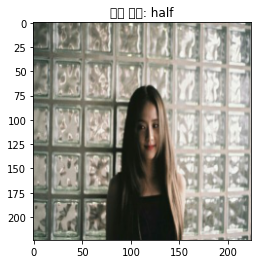

[예측 결과: half] (실제 정답: half)


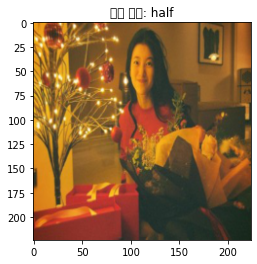

[예측 결과: half] (실제 정답: half)


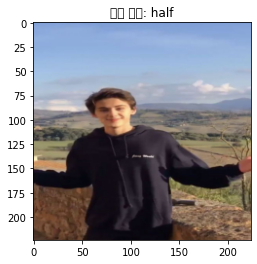

[예측 결과: half] (실제 정답: half)


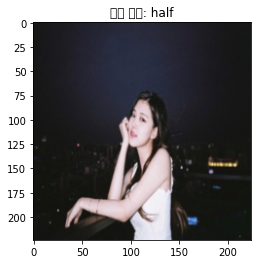

[예측 결과: half] (실제 정답: half)


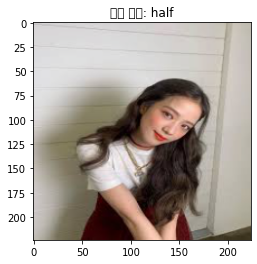

[예측 결과: selfie] (실제 정답: selfie)


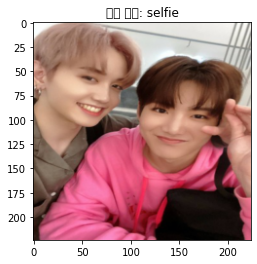

[예측 결과: half] (실제 정답: half)


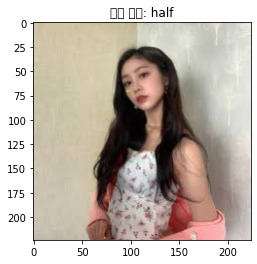

[예측 결과: half] (실제 정답: half)


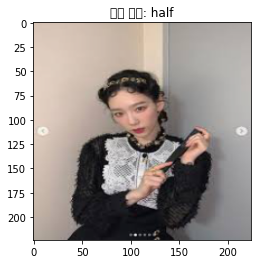

[예측 결과: half] (실제 정답: half)


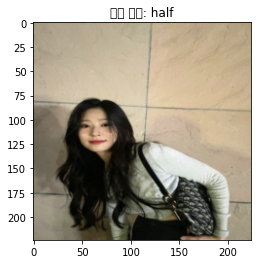

[예측 결과: selfie] (실제 정답: selfie)


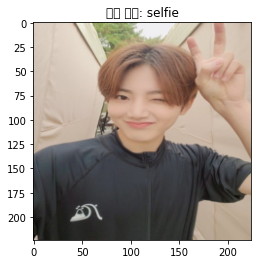

[예측 결과: wholestand] (실제 정답: wholestand)


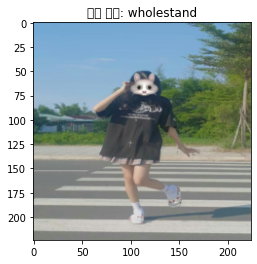

[예측 결과: half] (실제 정답: half)


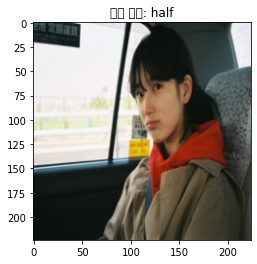

[예측 결과: selfie] (실제 정답: half)


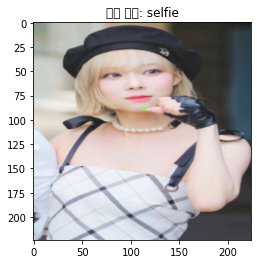

[예측 결과: wholestand] (실제 정답: wholestand)


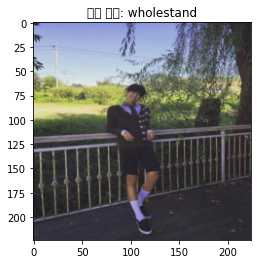

[예측 결과: selfie] (실제 정답: selfie)


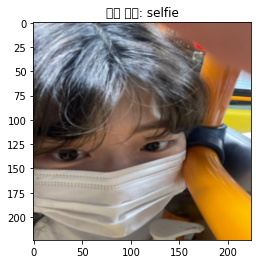

[예측 결과: half] (실제 정답: half)


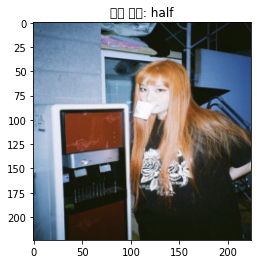

[예측 결과: half] (실제 정답: half)


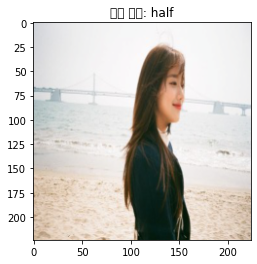

[예측 결과: half] (실제 정답: half)


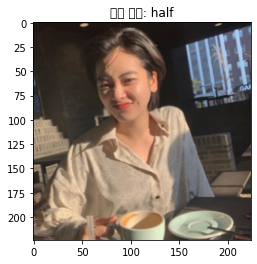

[예측 결과: longhalf] (실제 정답: half)


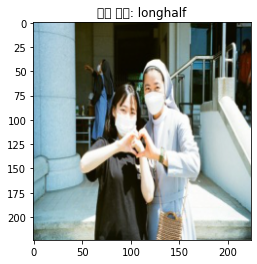

[예측 결과: longhalf] (실제 정답: longhalf)


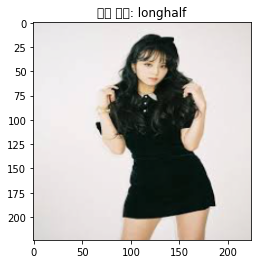

[예측 결과: selfie] (실제 정답: selfie)


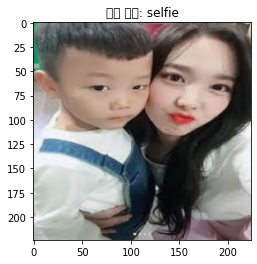

[예측 결과: longhalf] (실제 정답: longhalf)


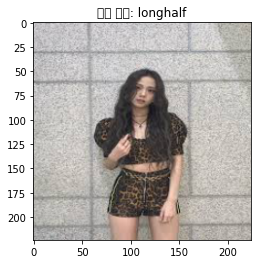

[예측 결과: half] (실제 정답: half)


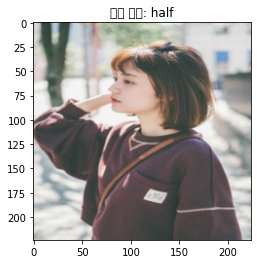

[예측 결과: half] (실제 정답: half)


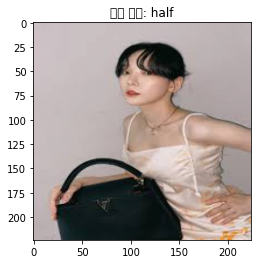

[예측 결과: wholesit] (실제 정답: wholesit)


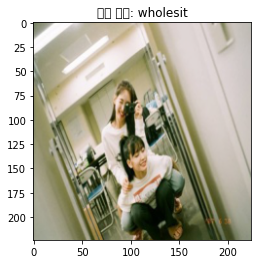

[예측 결과: selfie] (실제 정답: half)


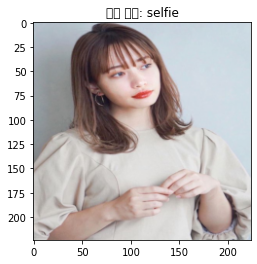

[예측 결과: longhalf] (실제 정답: longhalf)


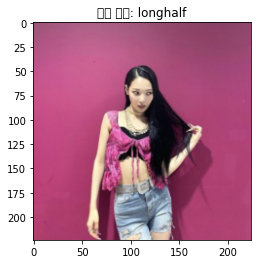

[예측 결과: selfie] (실제 정답: selfie)


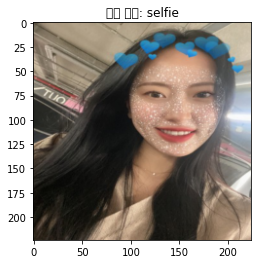

[예측 결과: selfie] (실제 정답: selfie)


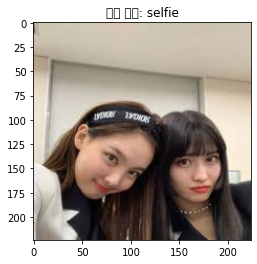

[예측 결과: half] (실제 정답: half)


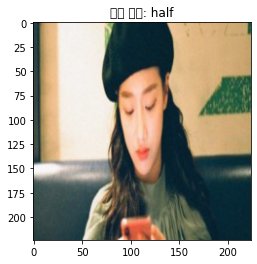

[예측 결과: longhalf] (실제 정답: longhalf)


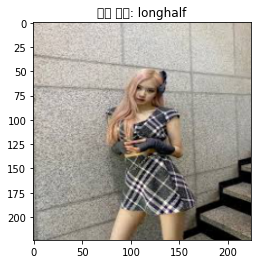

[예측 결과: wholesit] (실제 정답: wholesit)


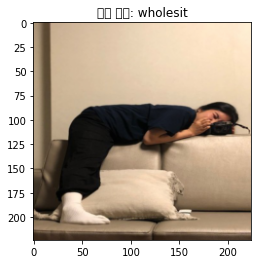

[예측 결과: half] (실제 정답: half)


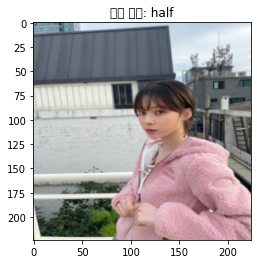

[예측 결과: half] (실제 정답: half)


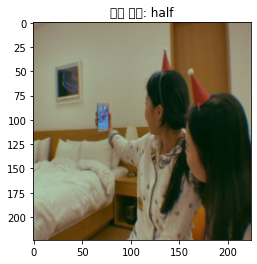

[예측 결과: longhalf] (실제 정답: half)


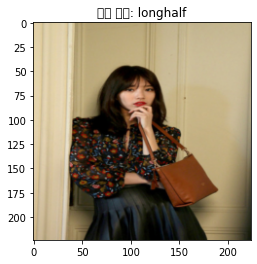

[예측 결과: half] (실제 정답: half)


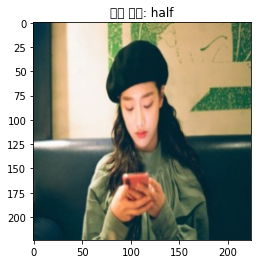

[예측 결과: half] (실제 정답: half)


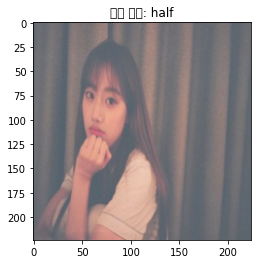

[예측 결과: half] (실제 정답: half)


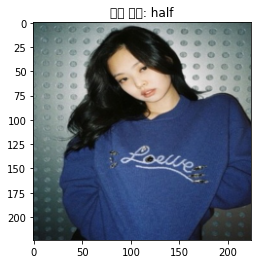

[예측 결과: selfie] (실제 정답: selfie)


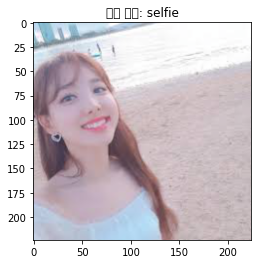

[예측 결과: half] (실제 정답: half)


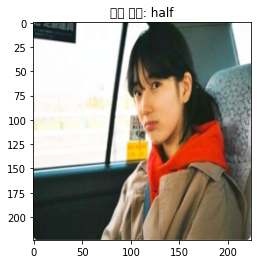

[예측 결과: half] (실제 정답: half)


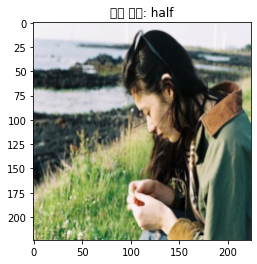

[예측 결과: selfie] (실제 정답: half)


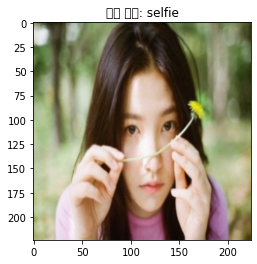

[예측 결과: half] (실제 정답: half)


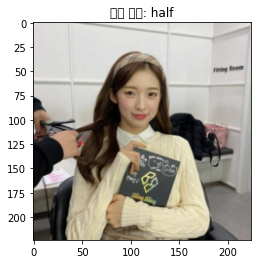

[예측 결과: selfie] (실제 정답: selfie)


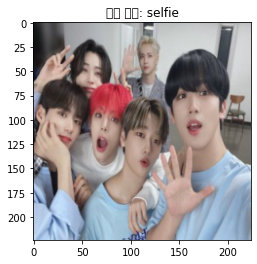

[예측 결과: half] (실제 정답: half)


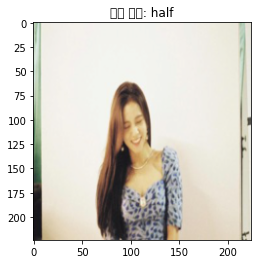

[예측 결과: half] (실제 정답: half)


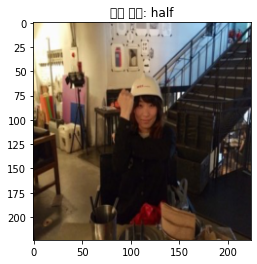

[예측 결과: half] (실제 정답: half)


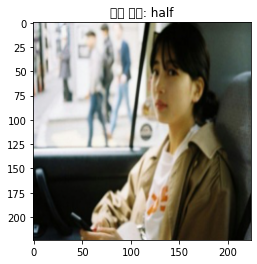

[예측 결과: half] (실제 정답: half)


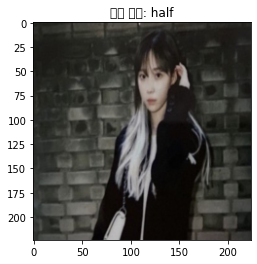

[예측 결과: half] (실제 정답: half)


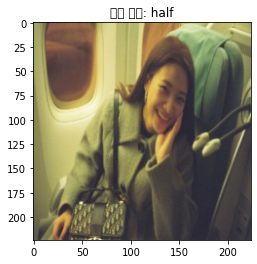

[예측 결과: half] (실제 정답: half)


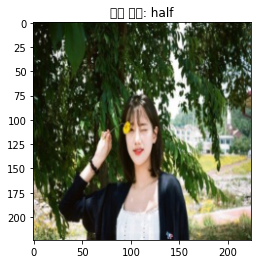

[예측 결과: half] (실제 정답: half)


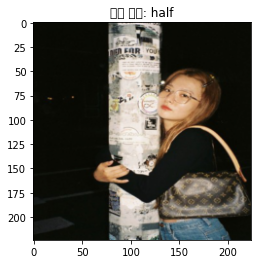

[예측 결과: half] (실제 정답: half)


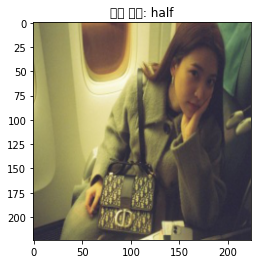

[예측 결과: longhalf] (실제 정답: half)


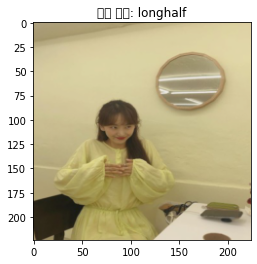

[예측 결과: half] (실제 정답: half)


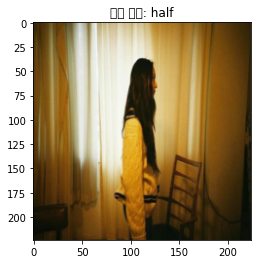

[예측 결과: selfie] (실제 정답: selfie)


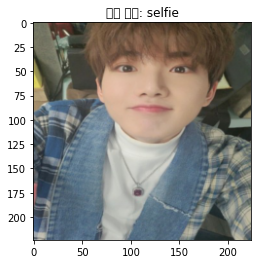

[예측 결과: half] (실제 정답: half)


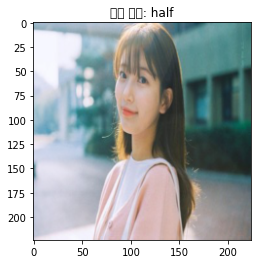

[예측 결과: half] (실제 정답: half)


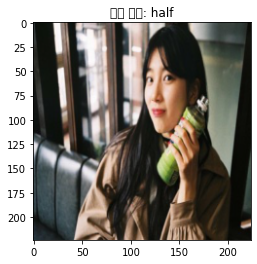

[예측 결과: longhalf] (실제 정답: half)


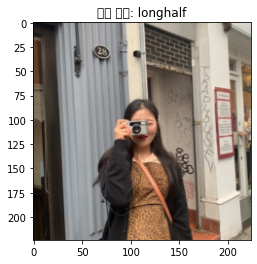

[예측 결과: selfie] (실제 정답: selfie)


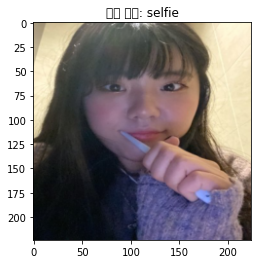

[예측 결과: selfie] (실제 정답: selfie)


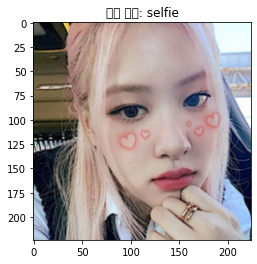

[예측 결과: selfie] (실제 정답: half)


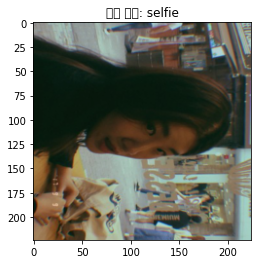

[예측 결과: longhalf] (실제 정답: half)


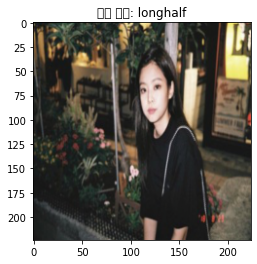

[예측 결과: half] (실제 정답: half)


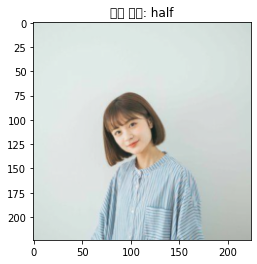

[예측 결과: half] (실제 정답: half)


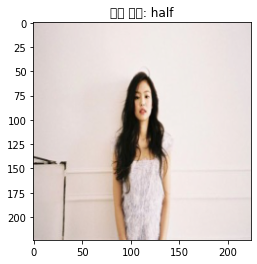

[예측 결과: longhalf] (실제 정답: longhalf)


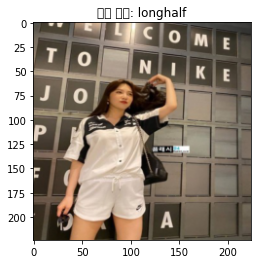

[Test Phase] Loss: 1.0901 Acc: 79.4554% Time: 20.3194s


In [19]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [24]:
# 테스트용 이미지 다운로드하기
!wget https://img.hankyung.com/photo/201906/bbef7d60bd116af47f627f63f221d2a3.jpg -O test_image.jpg

--2022-11-08 19:29:57--  https://img.hankyung.com/photo/201906/bbef7d60bd116af47f627f63f221d2a3.jpg
Resolving img.hankyung.com (img.hankyung.com)... 211.115.109.71
Connecting to img.hankyung.com (img.hankyung.com)|211.115.109.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483 (24K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  23.91K  91.8KB/s    in 0.3s    

2022-11-08 19:29:59 (91.8 KB/s) - ‘test_image.jpg’ saved [24483/24483]



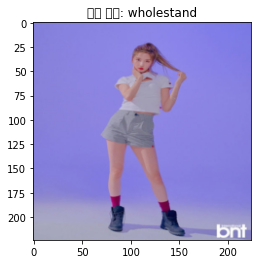

In [25]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])



```
# 코드로 형식 지정됨
```

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [26]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a3cf-34-141-143-5.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


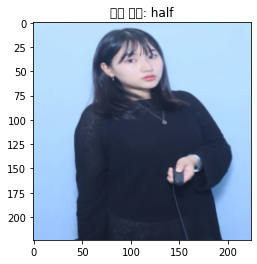

INFO:werkzeug:127.0.0.1 - - [08/Nov/2022 19:34:06] "POST / HTTP/1.1" 200 -


결과: {'class_name': 'half'}


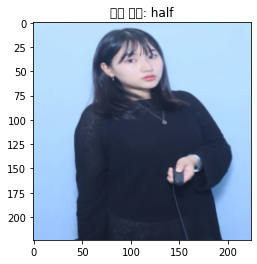

INFO:werkzeug:127.0.0.1 - - [08/Nov/2022 19:38:05] "POST / HTTP/1.1" 200 -


결과: {'class_name': 'half'}


In [28]:
run_with_ngrok(app)
app.run()

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.